<a href="https://colab.research.google.com/github/gishnum/naivebayes/blob/master/Naive_bayes_gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gaussian naive bayes __ data - sonar.csv

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/gishnum/naive-bayes-/master/Sonar%20(1).csv?token=AKA6I5TGOV3FEIX237X3RCK45N5Q6'

df = pd.read_csv(url)

df= pd.read_csv(url)

In [0]:
dum_sonar = pd.get_dummies(df,drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB



In [0]:
X =  dum_sonar.iloc[:,0:60]
y= dum_sonar.iloc[:,60]

In [0]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2019,stratify=y)

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)


In [12]:
print(confusion_matrix(y_test, y_pred))


[[17 17]
 [ 6 23]]


In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.50      0.60        34
           1       0.57      0.79      0.67        29

    accuracy                           0.63        63
   macro avg       0.66      0.65      0.63        63
weighted avg       0.66      0.63      0.63        63



In [14]:
print(accuracy_score(y_test, y_pred))

0.6349206349206349


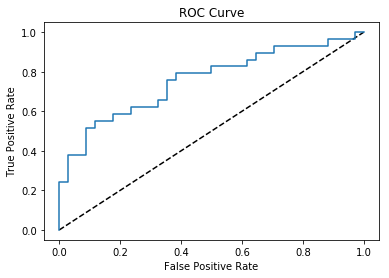

0.755578093306288

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
probs = gaussian.predict_proba(X_test)
y_pred_prob = probs[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)